# The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data set
data = pd.read_csv("H:/data/clusturing/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv")


In [3]:
# check null value
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Calculate minimum,maximum, mean,standard deviation and percentile  given data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


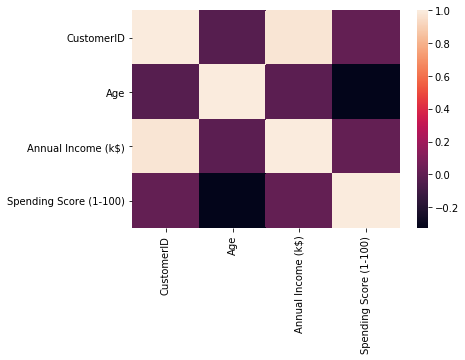

In [5]:
sns.heatmap(data.corr())   #Show the reletion 

In [7]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [8]:
data = data.iloc[:, 3:5].values
# This take Age,Spending Score(1-100) and Annual Income(k$) 

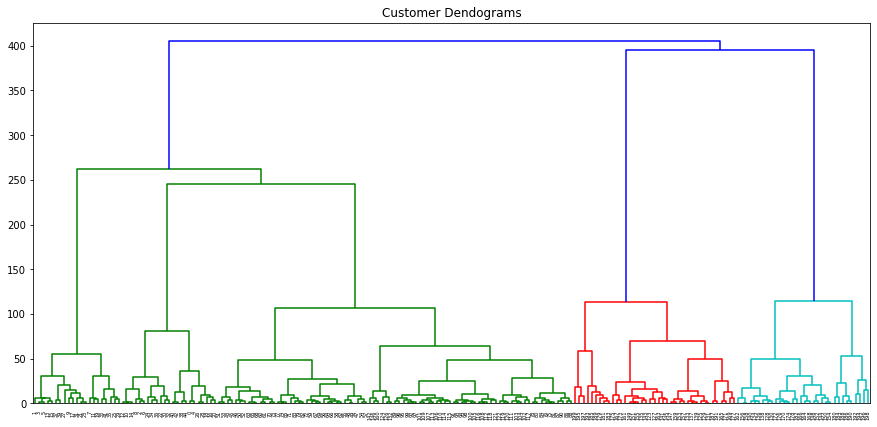

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward')) # there the tow methed of linkage first is single linkage and second is 
                                                        # ward ("Multiple Linkage") method

In [10]:
from sklearn.cluster import AgglomerativeClustering

X1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
X1.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

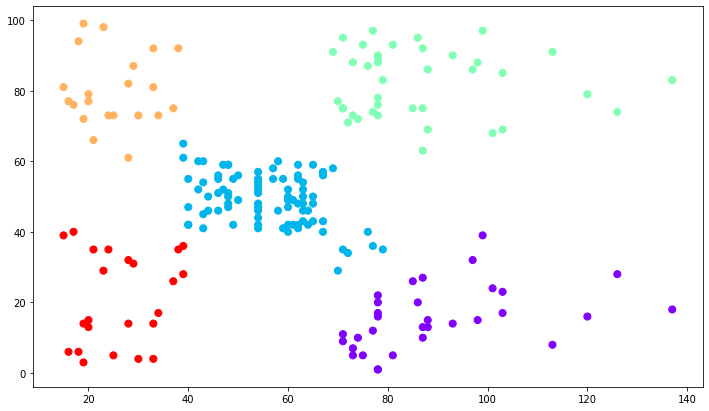

In [11]:
plt.figure(figsize=(12, 7))
plt.scatter(data[:,0], data[:,1], c=X1.labels_, cmap='rainbow',s = 50)
plt.show()